In [10]:
import os
from dotenv import load_dotenv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
from scipy.optimize import curve_fit

In [15]:
load_dotenv()
alpha_vantage_api_key = os.getenv('ALPHA_VANTAGE_API_KEY')

# Set the API key as an environment variable
os.environ['ALPHAVANTAGE_API_KEY'] = 'VMNUT5346O7EZNEX'

# Create the TimeSeries object
ts = TimeSeries(output_format='pandas')
ts = TimeSeries(key=alpha_vantage_api_key, output_format='pandas')

                     1. open  2. high  3. low   Close  5. volume
date                                                            
2023-10-04 19:45:00   120.34   120.34  119.56  119.56      113.0
2023-10-04 19:00:00   120.14   120.14  120.14  120.14   244040.0
2023-10-04 18:30:00   120.14   120.14  120.00  120.00   244044.0
2023-10-04 18:15:00   120.70   120.70  120.70  120.70        4.0
2023-10-04 18:00:00   119.55   120.54  119.55  120.54       49.0


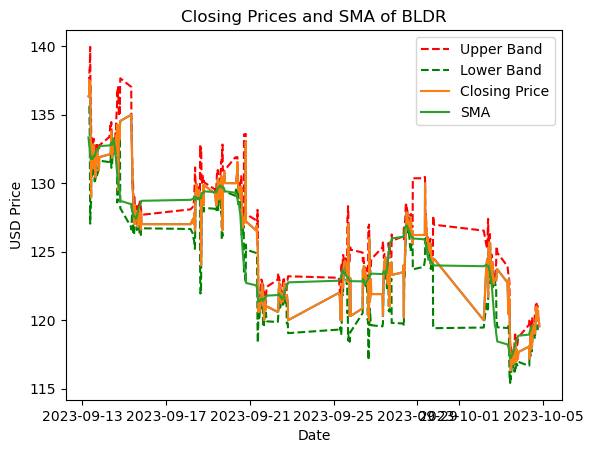

In [19]:
tickers = ['BLDR'] #,'AAPL', 'GOOGL', 'MSFT', 'AMZN']
i = 0

for ticker in tickers:
    data, meta_data = ts.get_intraday(symbol=ticker, outputsize='full')
    
    df = pd.DataFrame(data) #Create Panda Dataframe
    df = df.rename(columns={'4. close': 'Close'}) #Rename Column
    print(df.head())
    # Calculate the rolling mean and standard deviation
    window = 5
    rolling_mean = df['Close'].rolling(window).mean()
    rolling_std = df['Close'].rolling(window).std()

    # Calculate the upper and lower bands
    upper_band = rolling_mean + 2 * rolling_std
    lower_band = rolling_mean - 2 * rolling_std

    # Plot the uncertainty bands
    plt.plot(upper_band, color='red', linestyle='--', label='Upper Band')
    plt.plot(lower_band, color='green', linestyle='--', label='Lower Band')
    plt.plot(df['Close'])

    # Calculate the simple moving average (SMA)
    window = 30
    sma = df['Close'].rolling(window).mean()

    # Plot the closing prices and SMA
    plt.plot(df['Close'], label='Closing Price')
    plt.plot(sma, label='SMA')

    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('USD Price')
    SMA_title = 'Closing Prices and SMA of '+ str(tickers[i])
    plt.title(SMA_title)

    plt.legend()
    plt.show()
    i = i + 1 